# **CLASSIFICATION MODEL FOR THE SIDE EFFECTS OF DRUGS**


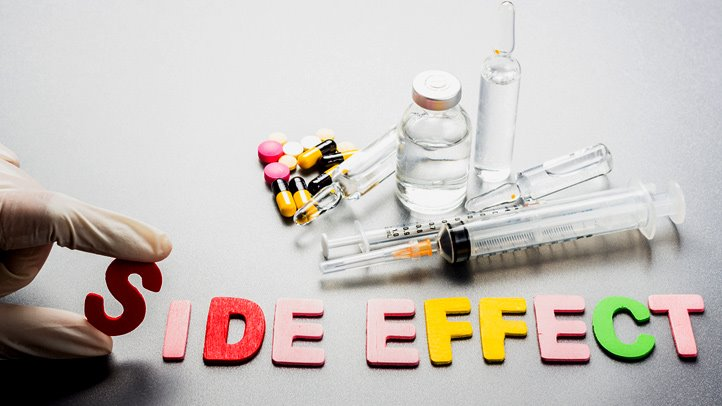

**TO MODEL A CLASSIFICATION MODEL FOR THE SIDEEFFECTS OF DRUGS**.

FOR THAT I SELECTED A DATASET FROM KAGGLE HAVING MORE THAN 3LAKH DATA
ENTRIES AND 12 COLUMNS WHICH INCLUDES Race, Age	, Condition,	Date,	Drug	,DrugId,	EaseofUse,	Effectiveness,	Reviews,	Satisfaction,	Sex,	Sideeffects.

# **BASIC DATA ANALYSIS**

# **Import the libraries **

In [83]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import altair as alt
import itertools
import keras
import math
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Import dataset**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv(r'/content/drive/MyDrive/webmd.csv')

# **Display dataset**

In [ ]:
data.head()

Age      Condition       Date                          Drug  DrugId  \
0  75 or over    Stuffy Nose  9/21/2014                  25dph-7.5peh  146724   
1       25-34  Cold Symptoms  1/13/2011                  25dph-7.5peh  146724   
2       65-74          Other  7/16/2012  warfarin (bulk) 100 % powder  144731   
3  75 or over          Other  9/23/2010  warfarin (bulk) 100 % powder  144731   
4       35-44          Other   1/6/2009  warfarin (bulk) 100 % powder  144731   

   EaseofUse  Effectiveness  \
0          5              5   
1          5              5   
2          2              3   
3          2              2   
4          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   

                                               Sides  UsefulCount  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2                                                               0  
3                                                               0  
4                                                               1

# **BASIC DATA ANALYSIS**

In [ ]:
data.shape #find the shape of dataset

(362806, 12)

In [ ]:
data.info()#basic dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
data.columns # columns in dataset

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
data = pd.DataFrame(data)# display categorical colums

# Get the column names of categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:")
for column in categorical_columns:
    print(column)



Categorical columns:
Age
Condition
Date
Drug
Reviews
Sex
Sides


In [ ]:
data = pd.DataFrame(data)#display numerical columns

# Get the column names of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Numerical column headings:")
for column in numerical_columns:
    print(column)

Numerical column headings:
DrugId
EaseofUse
Effectiveness
Satisfaction
UsefulCount


In [ ]:
data.describe()

DrugId      EaseofUse  Effectiveness   Satisfaction  \
count  362806.000000  362806.000000  362806.000000  362806.000000   
mean    36879.370774       4.019829       3.532061       3.135408   
std     52624.412971       1.317711       1.455961       1.611106   
min         1.000000       1.000000       1.000000       1.000000   
25%      4896.000000       3.000000       3.000000       1.000000   
50%      9548.000000       5.000000       4.000000       3.000000   
75%     63522.000000       5.000000       5.000000       5.000000   
max    178546.000000      10.000000      10.000000      10.000000   

         UsefulCount  
count  362806.000000  
mean        6.744916  
std         9.324240  
min         0.000000  
25%         1.000000  
50%         4.000000  
75%         9.000000  
max       255.000000

## Adding names and race to the dataframe. This just for easiness to analysis.

In [ ]:
pip install mimesis

In [ ]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])
data_name.head()

Name
0  Sebastian
1    Wilfred
2      Allan
3      Lisha
4       Hoyt

In [ ]:
import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head()

Race
0  Black
1  White
2  White
3  White
4  Black

In [ ]:
data1 = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

Name   Race         Age      Condition       Date  \
0  Sebastian  Black  75 or over    Stuffy Nose  9/21/2014   
1    Wilfred  White       25-34  Cold Symptoms  1/13/2011   
2      Allan  White       65-74          Other  7/16/2012   
3      Lisha  White  75 or over          Other  9/23/2010   
4       Hoyt  Black       35-44          Other   1/6/2009   

                           Drug  DrugId  EaseofUse  Effectiveness  \
0                  25dph-7.5peh  146724          5              5   
1                  25dph-7.5peh  146724          5              5   
2  warfarin (bulk) 100 % powder  144731          2              3   
3  warfarin (bulk) 100 % powder  144731          2              2   
4  warfarin (bulk) 100 % powder  144731          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   

                                               Sides  UsefulCount  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2                                                               0  
3                                                               0  
4                                                               1

# **DATA PROCESSING**

# Finding NULL values

In [ ]:
for i in data1:
    data1[i]=np.where(data1[i]==" ",np.NAN,data1[i])

data1.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41861
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

Age condition reviews sex and seide effects column having null values.

In [ ]:
data1.shape

(362806, 14)

# **Missing values imputation**

In [ ]:
# drop 'Other' condition from original dataset as other condition does not have any meaning
data1=data1.drop(labels=data[data1.Condition=='Other'].index,axis=0)

In [ ]:
#Missing value imputation for categorical vlaue
#Get the object columns

obj_columns1=data1[['Age']]
obj_columns2 = data1[['Reviews']]
obj_columns3 = data1[['Sex']]
obj_columns4 = data1[['Sides']]
obj_columns5 = data1[['Condition']]

In [ ]:
df=data1

In [ ]:
# mode value for each object column

age_mode = df.Age.mode()
Reviews_mode = df.Reviews.mode()
Sex_mode = df.Sex.mode()
Sides_mode = df.Sides.mode()
Condition_mode = df.Condition.mode()
print (" Mode for Age column\n",age_mode)
print (" \nMode for Reviews column\n",Reviews_mode)
print (" \nMode for Sex column\n",Sex_mode)
print (" \nMode for Sides column\n",Sides_mode)
print (" \nMode for Condition column\n",Condition_mode)

 Mode for Age column
 0    45-54
Name: Age, dtype: object
 
Mode for Reviews column
 0    this treatment is awsome.  I love drugs.
Name: Reviews, dtype: object
 
Mode for Sex column
 0    Female
Name: Sex, dtype: object
 
Mode for Sides column
 0    Nausea ,  vomiting ,  constipation ,  lighthea...
Name: Sides, dtype: object
 
Mode for Condition column
 0    Pain
Name: Condition, dtype: object


In [ ]:
#Missing value imputation for categorical vlaue
obj_columns1 = obj_columns1.fillna(obj_columns1.mode().iloc[0])
obj_columns2 = obj_columns2.fillna(obj_columns2.mode().iloc[0])
obj_columns3 = obj_columns3.fillna(obj_columns3.mode().iloc[0])
obj_columns4 = obj_columns4.fillna(obj_columns4.mode().iloc[0])
obj_columns5 = obj_columns5.fillna(obj_columns5.mode().iloc[0])

In [ ]:
#Join the data set with imputed object dataset
data_cleaned=pd.concat([df,obj_columns1,obj_columns2,obj_columns3,obj_columns4,obj_columns5],axis=1)

In [ ]:
# drop the column having null values
data_cleaned = data_cleaned.dropna(how = 'any', axis = 1)

In [ ]:
# As input feature should be in interger data type, so change the data type of every feature
# Total unique values in age and sex column


print("unique values in age column:\n",data_cleaned['Age'].unique())
print("\n unique values in Sex column:\n",data_cleaned['Sex'].unique())
print("\n unique values in Drug column:\n",data_cleaned['Drug'].unique())
print("\n unique values in Condition column:\n",data_cleaned['Condition'].unique())
print("\n unique values in Sidescolumn:\n",data_cleaned['Sides'].unique())


unique values in age column:
 ['75 or over' '25-34' '45-54' '55-64' '19-24' '35-44' '13-18' '65-74'
 '7-12' '0-2' '3-6']

 unique values in Sex column:
 ['Male' 'Female']

 unique values in Drug column:
 ['25dph-7.5peh' 'wymzya fe' '12 hour nasal relief spray, non-aerosol' ...
 'chest congestion relief dm' 'chantix' 'chateal']

 unique values in Condition column:
 ['Stuffy Nose' 'Cold Symptoms' 'Birth Control' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']

 unique values in Sidescolumn:
 ['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.'
 'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.'
 'Temporary burning, stinging, dryness in the nose,  runny nose , and  sneezing  may occur.'
 ...
 'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , o

In [ ]:

data_cleaned.isna().sum()# checking null values after imputation

Name             0
Race             0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Age              0
Reviews          0
Sex              0
Sides            0
Condition        0
dtype: int64

In [ ]:
unique_values = data_cleaned.nunique() #checking unique values

print(unique_values)

Name               3323
Race                  4
Date               4523
Drug               5641
DrugId             5135
EaseofUse             6
Effectiveness         6
Satisfaction          6
UsefulCount         147
Age                  11
Reviews          214424
Sex                   2
Sides              1594
Condition          1804
dtype: int64


From this i can understand that 5641 different drugs are mentioned in this dataset.

In [ ]:
#To covert data type of sex and age column into integer used mapping here
data_cleaned['Age'] = data_cleaned['Age'].map({'0-2': 1,
                                               '3-6': 2,
                                               '7-12': 3,
                                               '13-18': 4,
                                               '19-24': 5,
                                               '25-34': 6,
                                               '35-44': 7,
                                               '45-54': 8,
                                               '55-64': 9,
                                               '65-74': 10,
                                               '75 or over': 11}).astype(int)

data_cleaned['Sex'] = data_cleaned['Sex'].map({'Male': 0, 'Female': 1}).astype(int)


In [ ]:
# Converting the date in to date time format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [ ]:
# Remove the Drugs whose counts is less than 5 i.e. removed[1,2,3,4,5]
from collections import Counter
counts = data_cleaned['Drug'].value_counts()

data_cleaned = data_cleaned[~data_cleaned['Drug'].isin(counts[counts < 6].index)]

In [ ]:
print('Original Data set shape',df.shape),
print('\nClean Data set shape',data_cleaned.shape),

Original Data set shape (313041, 14)

Clean Data set shape (307072, 14)


(None,)

After preprocessing the dataset is cutdown from Original Data set shape (313041, 14)

Clean Data set shape (307072, 14)

In [ ]:
most_common_value = data_cleaned.mode().iloc[0] #finding most repeated values

print(most_common_value)

Name                                                         Royce
Race                                                         White
Date                                           2007-10-29 00:00:00
Drug                                                    lisinopril
DrugId                                                      6873.0
EaseofUse                                                      5.0
Effectiveness                                                  5.0
Satisfaction                                                   5.0
UsefulCount                                                    0.0
Age                                                            8.0
Reviews                   this treatment is awsome.  I love drugs.
Sex                                                            1.0
Sides            Nausea ,  vomiting ,  constipation ,  lighthea...
Condition                                                     Pain
Name: 0, dtype: object


From this i can understand that the drugname which is most mentioned in data is  Drug name and the Drug Id mentioned is **6873(lisinopril)**. Age group of 45-54 and female people affects more.

# From this I confirmed the drug name mentioned most is as LISINOPRIL

## From this i confirmed the drugid most mentioned is **6873 lisinopril**

In [ ]:
most_repeated_Drugnames= df['Drug'].value_counts().sort_values(ascending=False)

most_repeated_Drugnames

lisinopril solution               4158
lisinopril                        4158
cymbalta                          4134
lexapro                           3890
hydrocodone-acetaminophen         3818
                                  ... 
neutrogena t-gel 0.5 % shampoo       1
taytulla                             1
tavalisse                            1
nymalize                             1
varubi                               1
Name: Drug, Length: 5641, dtype: int64

Arranging all the drugnames count in descending order. most mentioned drug Lisinopril.

In [ ]:
df.Drug.value_counts()

lisinopril solution                                                             4158
lisinopril                                                                      4158
cymbalta                                                                        4134
lexapro                                                                         3890
hydrocodone-acetaminophen                                                       3818
                                                                                ... 
nourianz 40 mg tablet antiparkinson adjuvant - adenosine receptor antagonist       1
advil allergy-congestion rlf                                                       1
norwegian cod liver oil                                                            1
adult robitussin peak cold m-s                                                     1
varubi                                                                             1
Name: Drug, Length: 5641, dtype: int64

In [ ]:
most_repeated_DrugId= df['DrugId'].value_counts().sort_values(ascending=False)

most_repeated_DrugId

6873.0      8316
1025.0      7492
6007.0      6585
4398.0      5536
11285.0     4662
            ... 
160793.0       1
12218.0        1
155429.0       1
55301.0        1
148938.0       1
Name: DrugId, Length: 5135, dtype: int64

arrange the drugId in descending order according to counts. from this i understand that 6873 lisinopril lexopraoxycodone (1025) is the most used drugs.

In [ ]:
count_of_drugid_6873 = most_repeated_DrugId.get(6873, 0)
print("Count of DrugId 6873:", count_of_drugid_6873)
drug_name = data_cleaned.loc[data_cleaned['DrugId'] == 1025, 'Drug'].iloc[0]
print(f"The name of the drug with drug ID 1025 is {drug_name}.")
count_of_drugid_1025 = most_repeated_DrugId.get(1025, 0)
print("Count of DrugId 1025:", count_of_drugid_1025)


Count of DrugId 6873: 8316
The name of the drug with drug ID 1025 is oxycodone tablet, oral only.
Count of DrugId 1025: 7492


so the DrugId 6873 is most

In [ ]:
satisfaction_count=data_cleaned['Satisfaction'].value_counts()
effectiveness_count=data_cleaned['Effectiveness'].value_counts()
ease_of_use_count=data_cleaned['EaseofUse'].value_counts()
li = [0,1,2,3,4,5,6]
Rating = pd.Series(li)
value_count=pd.concat([Rating ,satisfaction_count,effectiveness_count,ease_of_use_count],axis=1)
value_count.rename(columns = {0:'Rating','Satisfaction':'satisfaction_count','Effectiveness':'effectiveness_count','EaseofUse':'ease_of_use_count'}, inplace = True)

In [ ]:
value_count

Rating  satisfaction_count  effectiveness_count  ease_of_use_count
0.0       0                 NaN                  NaN                NaN
1.0       1             83835.0              47821.0            28906.0
2.0       2             30372.0              26247.0            15166.0
3.0       3             44578.0              51730.0            34841.0
4.0       4             54465.0              70652.0            64047.0
5.0       5             93820.0             110620.0           164110.0
6.0       6                 2.0                  2.0                2.0

In [ ]:

df1=data_cleaned
# Define the conditions for dropping rows
conditions = [
    df1['Satisfaction'] == 10,
    df1['Satisfaction'] == 6,
    df1['Effectiveness'] == 10,
    df1['Effectiveness'] == 6,
    df1['EaseofUse'] == 10,
    df1['EaseofUse'] == 6
]

# Combine the conditions using the logical OR operator
condition = np.logical_or.reduce(conditions)

# Drop the rows that meet the condition
df1.drop(df1[condition].index, inplace=True)


In [ ]:
print('Original Data set shape',df.shape),
print('\nClean Data set shape',df1.shape),

Original Data set shape (313041, 14)

Clean Data set shape (307070, 14)


(None,)

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df1.to_csv('new_data') #save the cleaned data set

In [ ]:
df1.describe()

DrugId      EaseofUse  Effectiveness   Satisfaction  \
count  307070.000000  307070.000000  307070.000000  307070.000000   
mean    35320.755075       4.039792       3.553629       3.143495   
std     51544.980762       1.300421       1.439781       1.603088   
min         1.000000       1.000000       1.000000       1.000000   
25%      4729.000000       3.000000       3.000000       1.000000   
50%      8862.000000       5.000000       4.000000       3.000000   
75%     63163.000000       5.000000       5.000000       5.000000   
max    178485.000000       5.000000       5.000000       5.000000   

         UsefulCount            Age            Sex  
count  307070.000000  307070.000000  307070.000000  
mean        6.966428       7.819373       0.728375  
std         9.441350       1.693127       0.444798  
min         0.000000       1.000000       0.000000  
25%         1.000000       7.000000       0.000000  
50%         4.000000       8.000000       1.000000  
75%         9.000000       9.000000       1.000000  
max       222.000000      11.000000       1.000000

# **EXPLORATORY DATA ANALYSIS**

**TYPES OF EXPLORATORY DATA ANALYSIS:**

Univariate Non-graphical

Multivariate Non-graphical

Univariate graphical

Multivariate graphical

**UNIVARIATE NON-GRAPHICAL**

In [ ]:
df1.shape

(307070, 14)

In [ ]:
df1.Sex.value_counts()

1    223662
0     83408
Name: Sex, dtype: int64

female are using this medicine more.

In [ ]:
df1.Age.value_counts()

8     77788
9     64166
7     46264
6     41763
10    35160
5     20706
11    12938
4      5905
3      1384
2       655
1       341
Name: Age, dtype: int64

age group between 45-54 uses more.

In [ ]:
df1['Year'] = pd.to_datetime(df1['Date'], errors='coerce').dt.year
df1['Month'] = pd.to_datetime(df1['Date'], errors='coerce').dt.month
df1['day_of_week'] = pd.to_datetime(df1['Date'], errors='coerce').dt.day_name()


FEATURE ENGINEERING

# **New Feature creation: Sideeffect**

In [ ]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data_cleaned['Sideeffect'] = data_cleaned['Satisfaction'].map(mapping)

In [ ]:
data_cleaned.columns

Index(['Name', 'Race', 'Date', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'UsefulCount', 'Age', 'Reviews', 'Sex', 'Sides',
       'Condition', 'Year', 'Month', 'day_of_week', 'Sideeffect'],
      dtype='object')

White and Hispanic users reported more extreme side effects

For the Lisinopril drug as example , i concluded as this drug have side effects but its effectiveness and satisfaction rate is good.Females are more affected by the sideeffects and females are the main users. age group of 55-64 having adverse affects. 45-64 is almost the same sideeffects. reviews counts decreased yearly. That means users body are adjusted to sideeffects or however users have the mentality to cure the sickness and not too much worry about sideeffects.

# **TEXT PROCESSING**

In [ ]:
text = data_cleaned.Reviews

In [ ]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)

    return text

In [ ]:
clean = lambda x: clean_text(x)
clean_text = text.apply(clean)

In [ ]:
#stop words
from google.colab import drive
drive.mount('/content/drive')
stop_word = pd.read_csv("/content/drive/MyDrive/stop.txt", header=None)
st_word = [i for i in stop_word[0]]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
my_stop_words = stop.copy()
#add some more stop words
for i in st_word:
    my_stop_words.append(i)

In [ ]:
len(st_word), len(stop), len(my_stop_words)

(571, 179, 750)

In [ ]:
#setiment analysis
from textblob import TextBlob

In [ ]:
df_text = pd.DataFrame({'Review':clean_text})

In [ ]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_text['review_stop'] = df_text['Review'].apply(lambda x: ' '.join(word for word in x.split() if word not in my_stop_words))

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lt = WordNetLemmatizer()
df_text['review_clean']  = df_text['review_stop'] .apply(lambda x: " ".join([lt.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# its gives the polarity and subjectivity values
df_text[['polarity', 'subjectivity']] = df_text['review_clean'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
for index, row in df_text['review_clean'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= - 0.05:
        df_text.loc[index, 'sentiment'] = -1   #'negative'
    elif comp >= 0.05:
        df_text.loc[index, 'sentiment'] =  1   #'positive'
    else:
        df_text.loc[index, 'sentiment'] =  0    #'neutral'
    df_text.loc[index, 'neg'] = neg
    df_text.loc[index, 'neu'] = neu
    df_text.loc[index, 'pos'] = pos
    df_text.loc[index, 'compound'] = comp

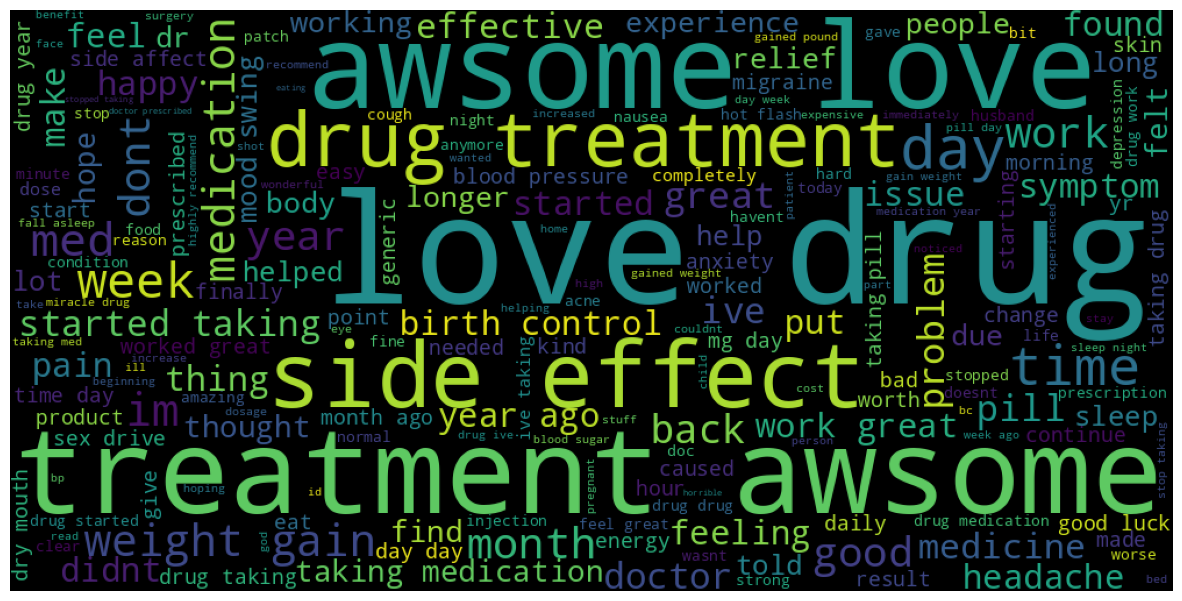

In [ ]:
# Word cloud of the Clean reviews with +ve sentiments
df_rate_ten = df_text.loc[df_text.sentiment == 1., 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('positive sentiment.jpg')

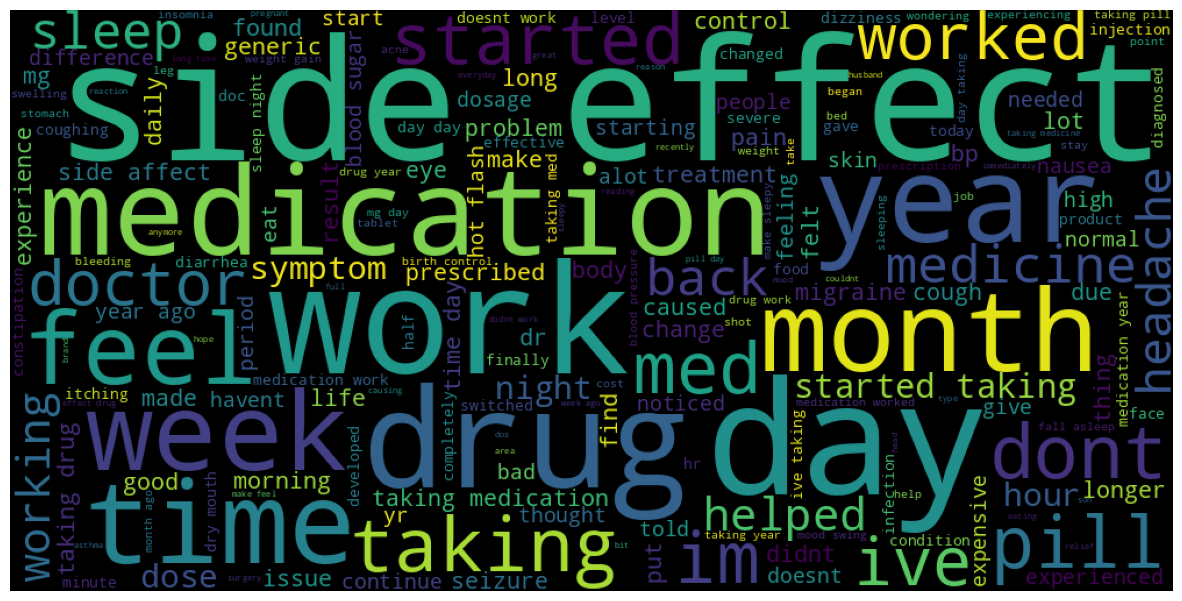

In [ ]:
# Word cloud of the Clean reviews with neutral sentiments
df_rate_ten = df_text.loc[df_text.sentiment == 0, 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('neutral sentiment.jpg')

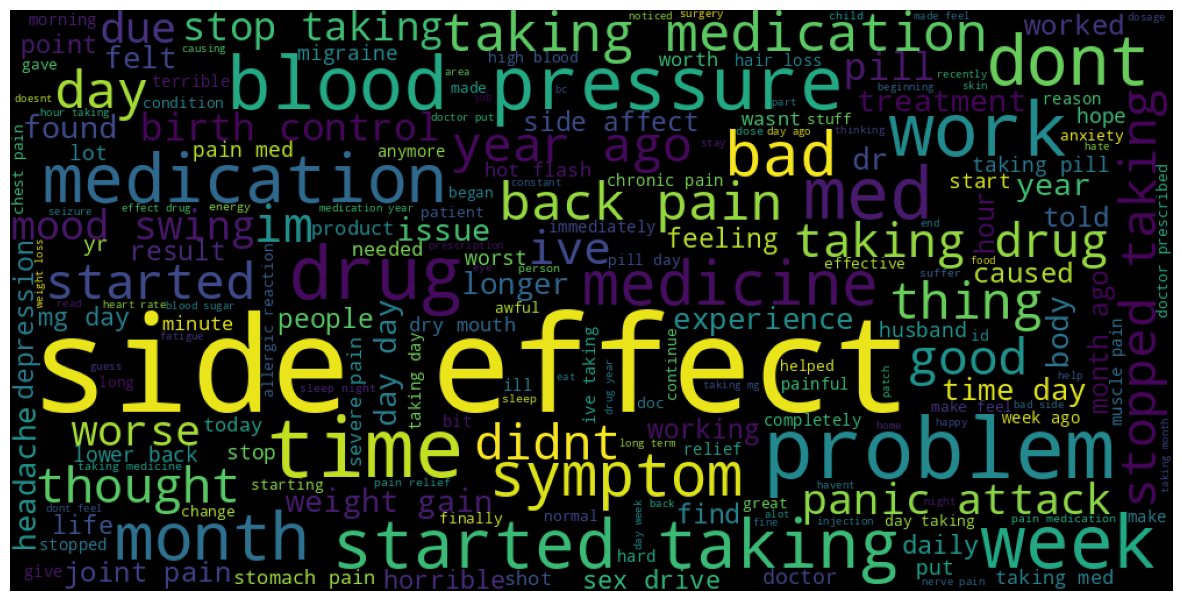

In [ ]:
# Word cloud of the Clean reviews with -ve sentiments
df_rate_ten = df_text.loc[df_text.sentiment == -1., 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative sentiment.jpg')

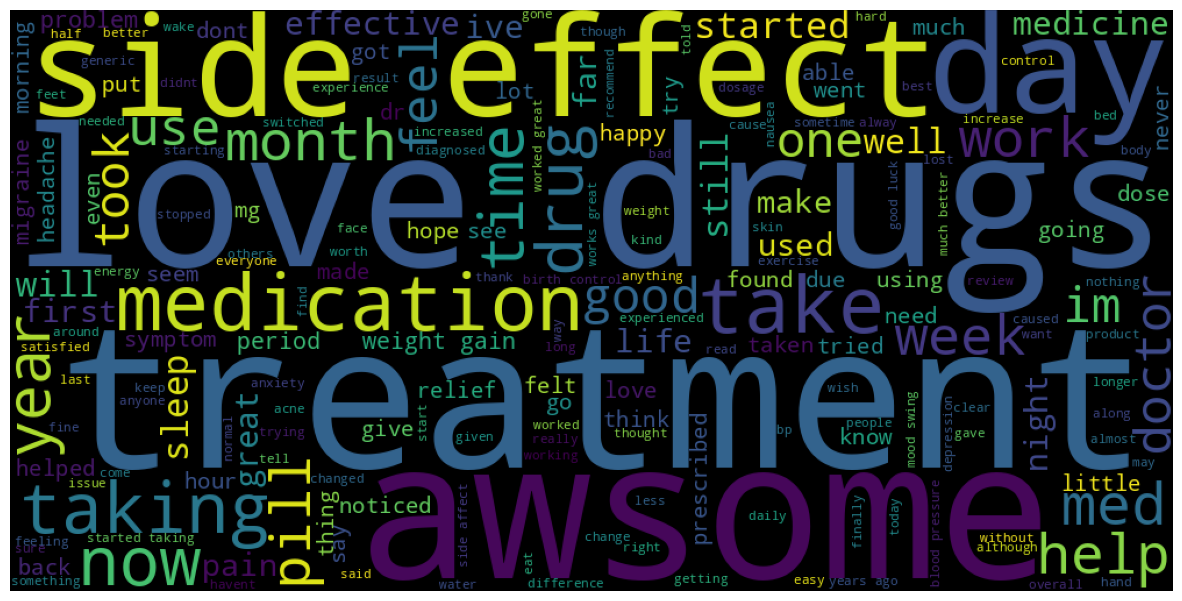

In [ ]:
# Word cloud of the reviews with Satisfaction_rating equal to 1
df_rate_ten = df_text.loc[df_text.sentiment == 1., 'Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('positive_sentiment_Rev.jpg')

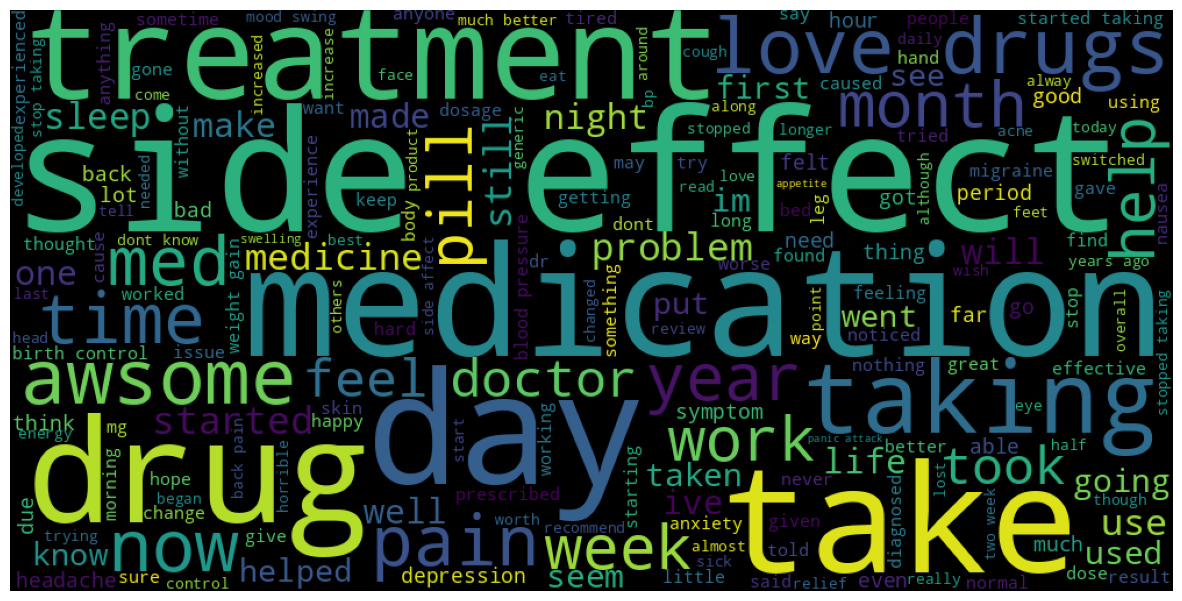

In [ ]:
# Word cloud of the unclean reviews
df_rate_ten = df_text['Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

plt.savefig('Review.jpg')

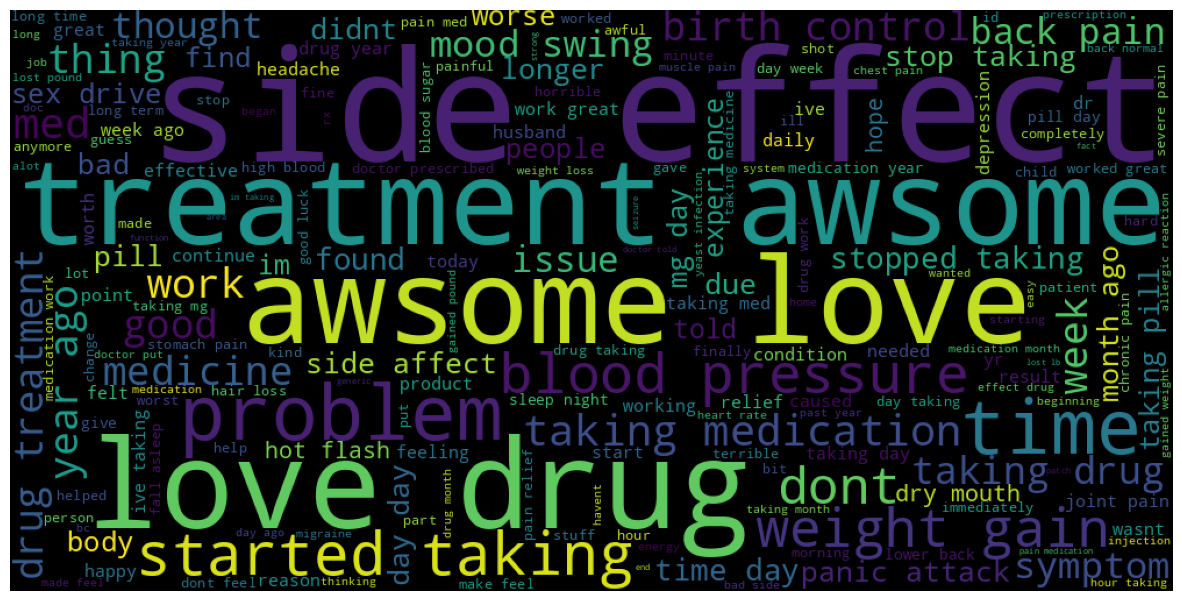

In [ ]:
# Word cloud of the Clean reviews
df_rate_ten = df_text['review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

plt.savefig('clean_review.jpg')

In [ ]:
#N-gram
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(df_text["review_clean"],ngram_range=(2,2), n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

Bi-gram   Freq
0       side effect  63020
1         love drug  37333
2  treatment awsome  37021
3       awsome love  37021
4    started taking  10018

In [ ]:
get_top_n2_words(df_text["review_clean"],ngram_range=(3,3), n=200) #trigram

[('treatment awsome love', 37021),
 ('awsome love drug', 37021),
 ('high blood pressure', 2023),
 ('bad side effect', 1574),
 ('side effect drug', 1456),
 ('lower back pain', 1119),
 ('experienced side effect', 1103),
 ('day side effect', 978),
 ('side effect medication', 947),
 ('started taking medication', 943),
 ('birth control pill', 901),
 ('year side effect', 901),
 ('drug side effect', 889),
 ('negative side effect', 872),
 ('horrible side effect', 790),
 ('month side effect', 783),
 ('side effect ive', 766),
 ('work side effect', 757),
 ('side effect taking', 703),
 ('medication side effect', 670),
 ('taking medication year', 653),
 ('side effect worth', 652),
 ('side effect experienced', 638),
 ('severe side effect', 632),
 ('sexual side effect', 628),
 ('side effect im', 615),
 ('pain side effect', 605),
 ('week side effect', 590),
 ('started taking drug', 547),
 ('side effect weight', 544),
 ('dont side effect', 539),
 ('side effect bad', 524),
 ('terrible side effect', 519)

In [ ]:
get_top_n2_words(df_text["review_clean"],ngram_range=(1,1), n=200) #bigram

[('drug', 110292),
 ('day', 107636),
 ('pain', 95613),
 ('taking', 92387),
 ('side', 73307),
 ('effect', 73112),
 ('year', 72389),
 ('medication', 67806),
 ('time', 62984),
 ('month', 61020),
 ('week', 54223),
 ('work', 50852),
 ('treatment', 49489),
 ('im', 45048),
 ('feel', 44800),
 ('started', 44471),
 ('doctor', 44294),
 ('back', 42860),
 ('love', 42643),
 ('med', 38802),
 ('pill', 37794),
 ('awsome', 37067),
 ('ive', 33730),
 ('dont', 32884),
 ('problem', 30440),
 ('sleep', 27664),
 ('night', 27075),
 ('bad', 26144),
 ('severe', 25781),
 ('good', 25188),
 ('life', 25187),
 ('weight', 24795),
 ('hour', 24185),
 ('mg', 23056),
 ('medicine', 22502),
 ('dose', 21673),
 ('make', 21671),
 ('worked', 20698),
 ('great', 20441),
 ('headache', 19791),
 ('felt', 19703),
 ('blood', 19189),
 ('dr', 18820),
 ('thing', 18711),
 ('prescribed', 18510),
 ('ago', 18074),
 ('feeling', 18022),
 ('symptom', 18016),
 ('made', 17725),
 ('period', 17589),
 ('didnt', 16784),
 ('helped', 16627),
 ('depressi

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


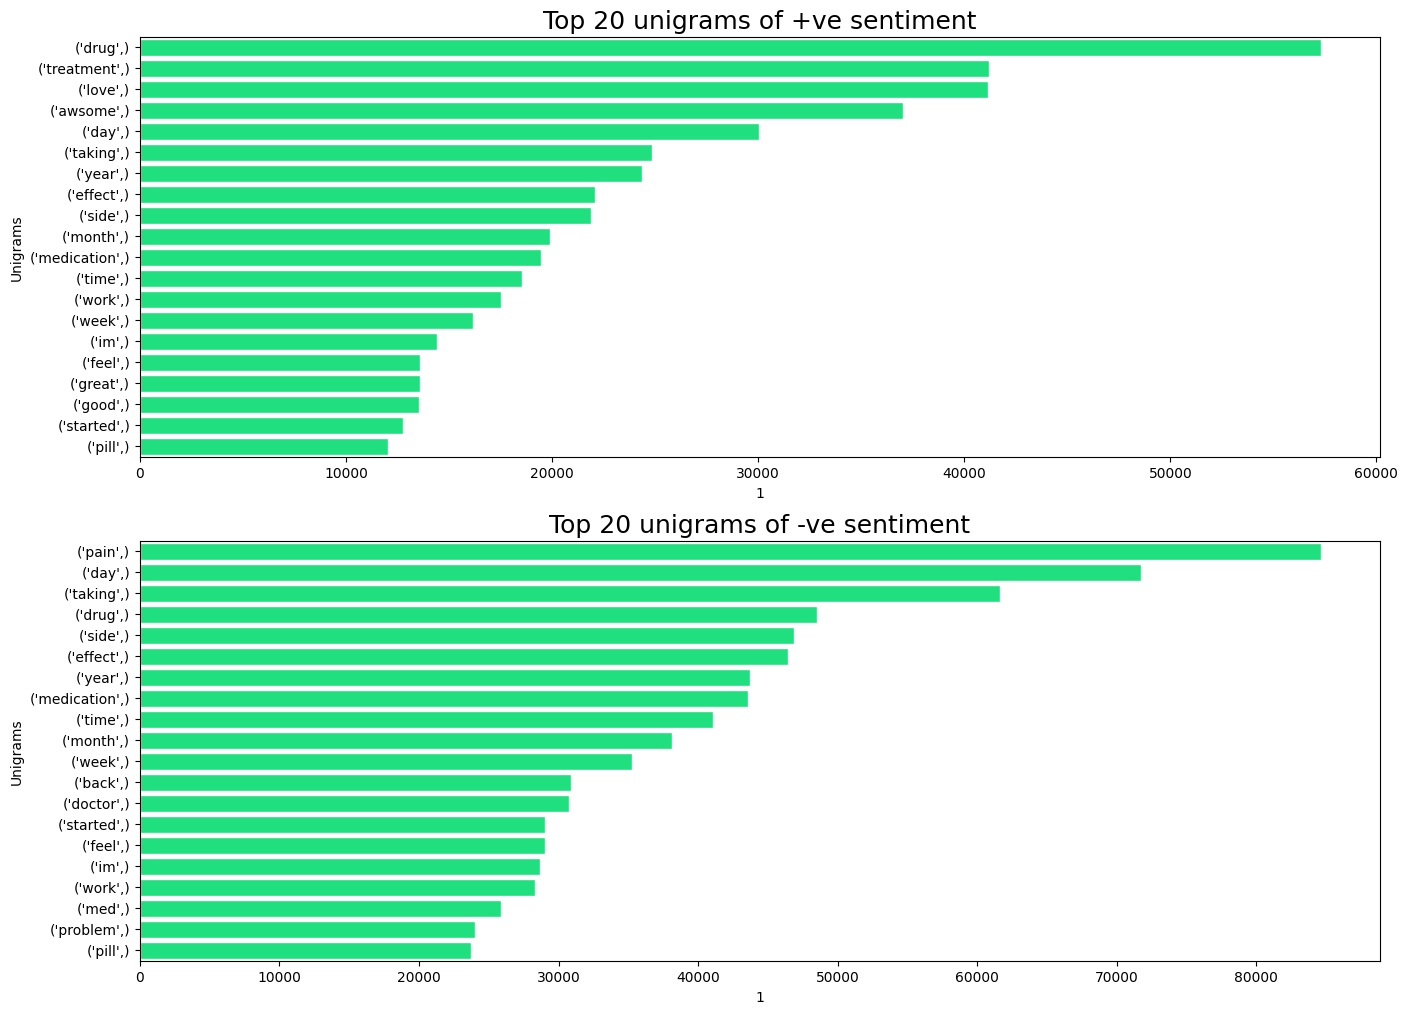

In [ ]:
nltk.download('punkt')
# Top 20 unigrams according to the Satisfaction_rating
df_ = df_text[['sentiment', 'review_clean']]
df_['Reviews'] = df_text['review_clean'].str.replace("&#039;", "")
df_['Reviews'] = df_['Reviews'].str.replace(r'[^\w\d\s]',' ')

df_review_3 = " ".join(df_.loc[df_.sentiment == 1., 'review_clean'])
df_review_5 = " ".join(df_.loc[df_.sentiment == -1., 'review_clean'])

token_review_3 = word_tokenize(df_review_3)
token_review_5 = word_tokenize(df_review_5)

unigrams_3 = ngrams(token_review_3, 1)
unigrams_5 = ngrams(token_review_5, 1)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 unigrams of +ve sentiment")
sns_5.set_title("Top 20 unigrams of -ve sentiment")
sns_3.set_ylabel("Unigrams")
sns_5.set_ylabel("Unigrams")

plt.savefig('Unigram_20.jpg')

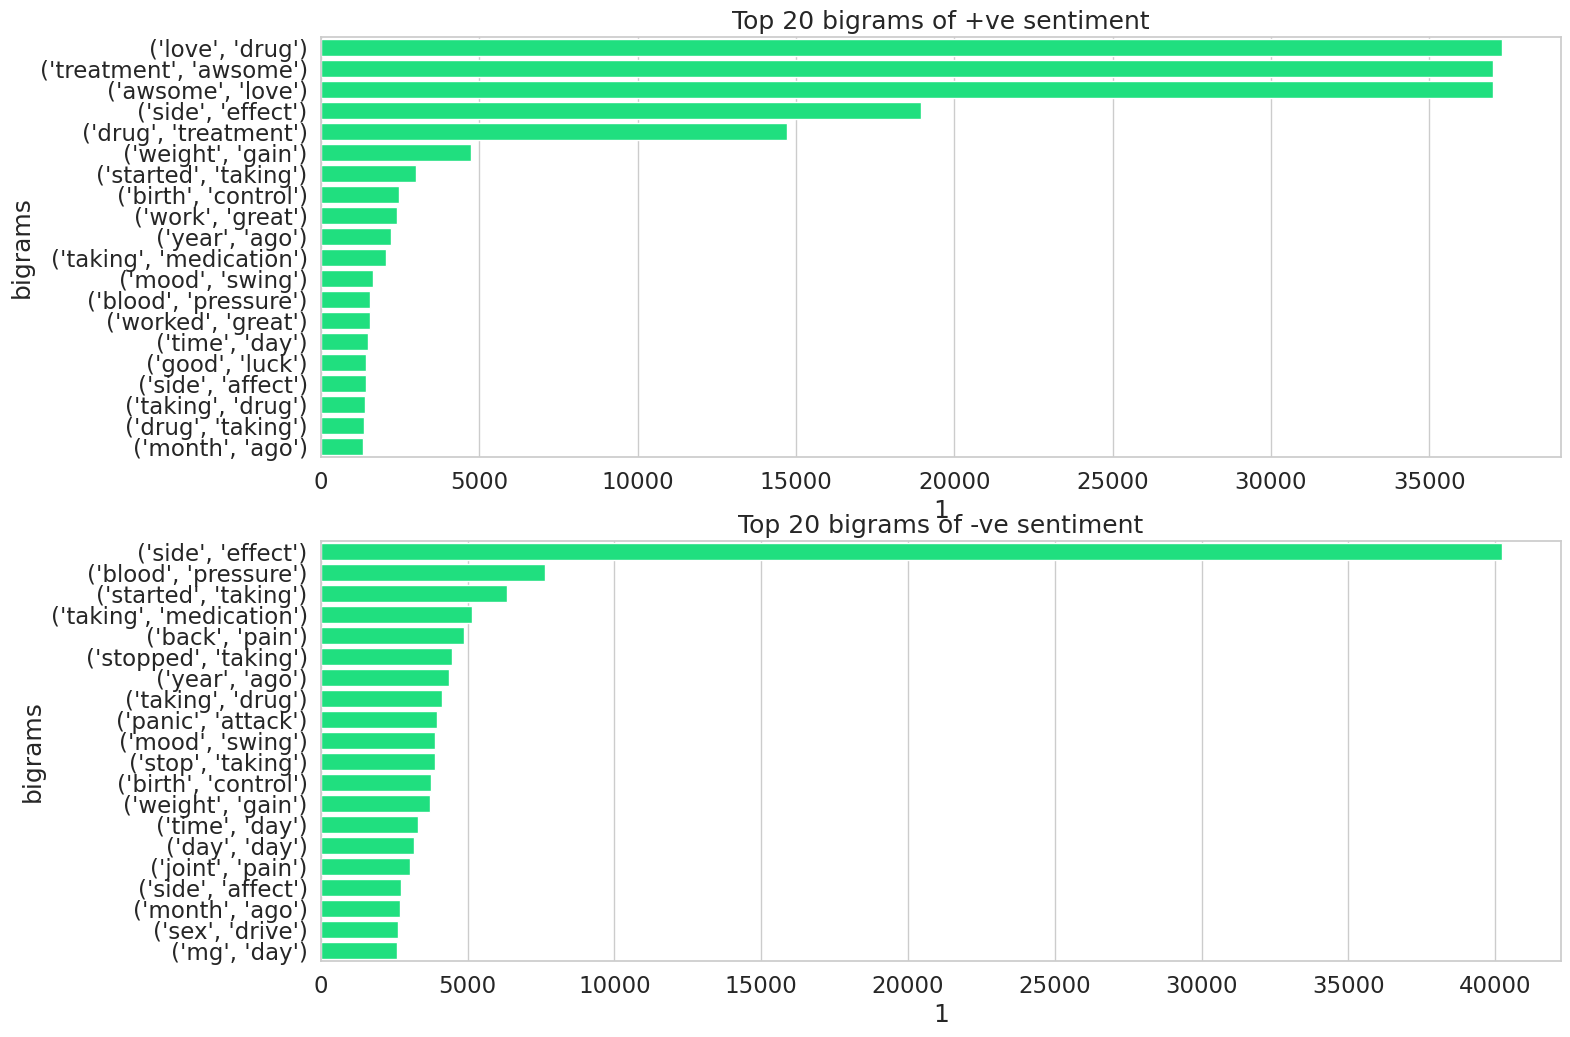

In [ ]:
# Top 20 bigarams according to the Satisfaction_rating
unigrams_3 = ngrams(token_review_3, 2)
unigrams_5 = ngrams(token_review_5, 2)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 bigrams of +ve sentiment")
sns_5.set_title("Top 20 bigrams of -ve sentiment")
sns_3.set_ylabel("bigrams")
sns_5.set_ylabel("bigrams")

plt.savefig('Biggram_20.jpg')

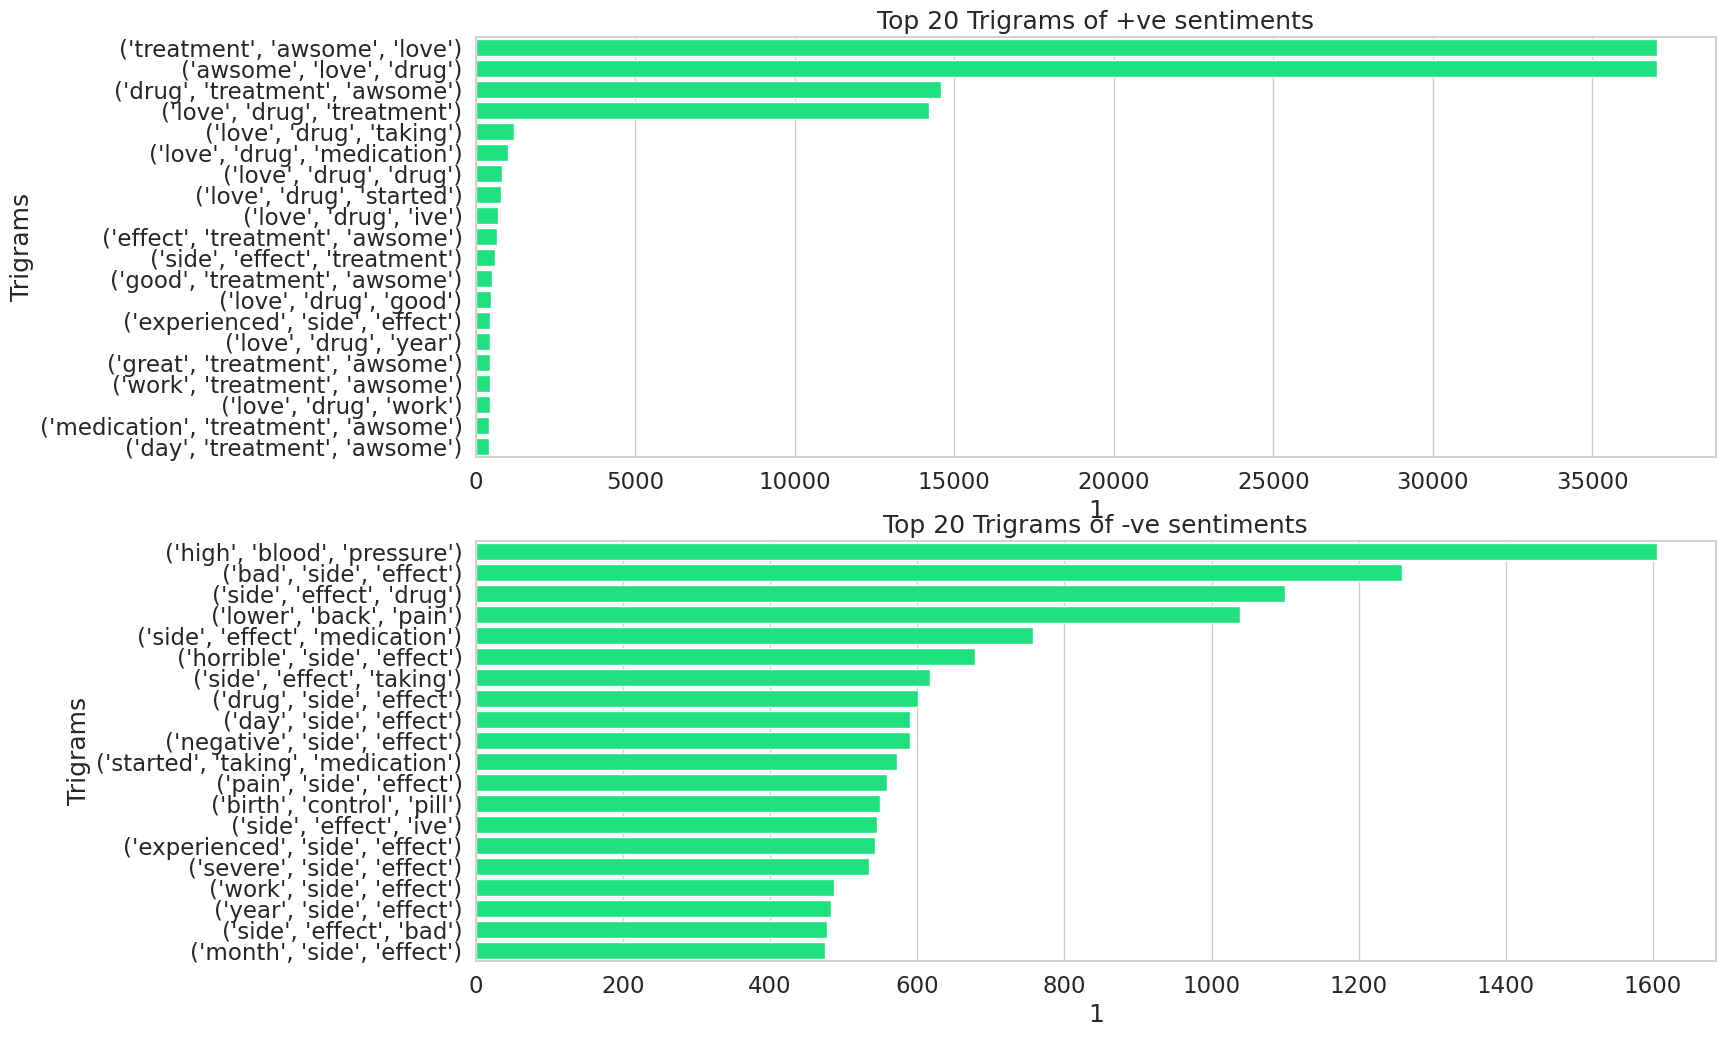

In [ ]:
# Top 20 Trigrams according to the Satisfaction_rating
unigrams_3 = ngrams(token_review_3, 3)
unigrams_5 = ngrams(token_review_5, 3)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 Trigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 Trigrams of +ve sentiments")
sns_5.set_title("Top 20 Trigrams of -ve sentiments")
sns_3.set_ylabel("Trigrams")
sns_5.set_ylabel("Trigrams");

plt.savefig('Trigram_20.jpg')

In [ ]:
text_data = df_text.tail(70000)

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tv = TfidfVectorizer()

# Fit the vectorizer with your text data
tv.fit(df_)

# Check scikit-learn version
if sklearn.__version__ >= '1.0':
    feature_names = tv.get_feature_names_out()
else:
    feature_names = tv.get_feature_names()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tv = TfidfVectorizer(max_features=1500, analyzer='word')

# Fit and transform the data using TfidfVectorizer
x = tv.fit_transform(text_data['review_clean'].values.astype('U'))

# Create a DataFrame from the TF-IDF matrix
tf_vect_df = pd.DataFrame(x.toarray(), columns=tv.get_feature_names_out())


In [ ]:
y=text_data.sentiment
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(tf_vect_df,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape, Y_test.shape
Y_train.value_counts()

-1.0    24796
 1.0    18354
 0.0     5850
Name: sentiment, dtype: int64

# **MODELLING**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import accuracy_score

# **LGBM CLASSIFIER**

In [82]:
# Training Model - I
clf1 = LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model1 = clf1.fit(X_train, Y_train)

# Predictions
predictions1 = model1.predict(X_test)
print ("The Accuracy of the train_data is : ", model1.score(X_train, Y_train))
print ("The Accuracy of the model is : ", accuracy_score(Y_test, predictions1))

The Accuracy of the train_data is :  0.9667959183673469
The Accuracy of the model is :  0.904
